### Dilution Problem in Python

A tank initially holds 100 gal of a brine solution containing 1 Ib of salt. At t = 0 another brine solution
containing 1 Ib of salt per gallon is poured into the tank at the rate of 3 gal/min, while the well-stirred
mixture leaves the tank at the same rate. Find (a) the amount of salt in the tank at any time t and (b) the
time at which the mixture in the tank contains 2 Ib of salt.

In [103]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [118]:
V0 = 100 # initial brine solution containing 1 lb of salt in the tank
a = 1 # amount of salt that brine solution contains initially at time = 0
b = 1 # amount of salt that another brine solution contains
e = 3 # rate at which another brine solution is poured into the tank
f = 3 # rate at which well-stirred mixture leaves the tank

In [133]:
def model(y,t):
    dydt = b*e-(f*y)/(V0+e*t-f*t)
    return dydt

# integrate the equations
t = np.linspace(0,100) # times to report solution
y = odeint(model,1,t) # integrate

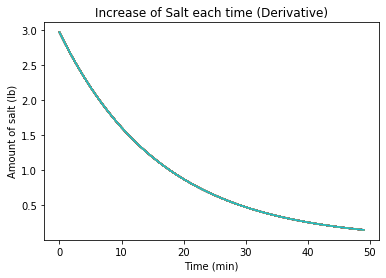

In [141]:
# plot results
plt.figure()
plt.plot(model(y,t));
plt.title('Increase of Salt each time (Derivative)')
plt.xlabel('Time (min)')
plt.ylabel('Amount of salt (lb)')
plt.show()

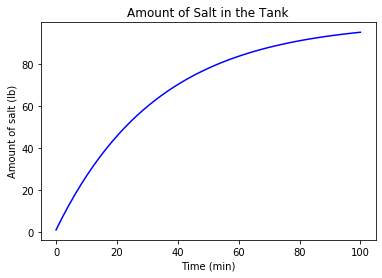

In [147]:
# plot results
plt.figure()
plt.plot(t,y,'b-')
plt.title('Amount of Salt in the Tank')
plt.xlabel('Time (min)')
plt.ylabel('Amount of salt (lb)')
plt.savefig('Amount of Salt in the Tank')
plt.show()